<a href="https://colab.research.google.com/github/UDEA-Esp-Analitica-y-Ciencia-de-Datos/EACD-04-MACHINE-LEARNING-1/blob/master/04-%5BTALLER%5D_Regresion_lineal_y_regresion_logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Recuerda que una vez abierto, Da clic en "Copiar en Drive", de lo contrario no podras alamancenar tu progreso**

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.


In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/UDEA-Esp-Analitica-y-Ciencia-de-Datos/EACD-04-MACHINE-LEARNING-1/master/init.py
import init; init.init(force_download=False); 

In [ ]:
#configuración del laboratorio
# Ejecuta esta celda!
%load_ext autoreload
%autoreload 2

# Taller - Parte 1

**Regresión polinomial múltiple**

In [ ]:
from local.lib.general import configure_lab1_p1
configure_lab1_p1()
from local.lib.lab1 import *
GRADER_LAB_1_P1, db, x, y = part_1()

## Ejercicio 1.1: Contextualización del problema

El problema de regresión que abordaremos consiste en predecir el valor de la humedad absoluta en el aire, a partir de varias variables sensadas en el aire (Para más información sobre la base de datos y la contextualización del problema, consulte: [link](http://archive.ics.uci.edu/ml/datasets/air+quality)).

In [ ]:
# tienes ya cargadas las siguientes variables:
print("conjunto de datos", x)
print("variable a predecir", y)

In [ ]:
#Ejercicio de Codigo
def num_muestras_carac(X):
    """Esta funcion es encargada retornar el numero de muestras
        y caracteristicas del conjunto de datos X

        X: matriz numpy
        retorna:
            numero de muestras (int/float)
            numero de caracteristicas (int/float)
    """
    
    return 

In [ ]:
## la funcion que prueba tu implementacion
GRADER_LAB_1_P1.run_test("ejercicio1.1", num_muestras_carac)

In [ ]:
#@title Pregunta Abierta
#@markdown  ¿que tipo de problema vamos a resolver?
respuesta_1 = " " #@param {type:"string"}

## Ejercicio 1.2

Analice los siguientes métodos de la teoría  de modelos de  *regresión polinomial múltiple*:

1. Error cuadrático medio (<font color='blue'>ECM</font>), 
2. Modelo de regresión múltiple (<font color='blue'>regression</font>)
4. Gradiente descendente.

La siguiente celda contiene la implementación del ECM y de la regression. Comprenda su funcionamiento y ejecute la celda para definir las funciones y poder usarlas.

In [ ]:
def ECM(Y,Y_est):
    """funcion para calcular el error cuadratico medio
    Y_est: debe contener los valores predichos por el modelo evaluar
    Y: debe contener los valores reales
    retorna: error cuadratico medio
    """
    N = np.size(Y)
    ecm = np.sum((Y_est.reshape(N,1) - Y.reshape(N,1))**2)/(N)
    return ecm 

def regression(X, W):
    """calcula la regresión multiple
    X: los valores que corresponden a las caractersiticas
    W: son los pesos usadados para realizar la regresión
    retorna: valor estimado
    """    
    Yest = np.dot(X,W)    #con np.dot se realiza el producto matricial. Aquí X es dim [Nxd] y W es dim [dx1]
    return Yest           #Esta variable contiene la salida de f(X,W)

De igual manera, debemos extender nuestro conjunto de datos.

In [ ]:
#Extendemos la matriz de X para incluir el término independiente
def MatrizExtendida(X):
    # par obtener el numero muestras y caractersiticas
    muestras,carac = num_muestras_carac(X)
    unos = np.array([np.ones(muestras)])
    x_ext = np.concatenate((unos.T, X), axis=1)
    x_ext = x_ext.reshape(muestras, carac+1)
    return x_ext

In [ ]:
## Ejercicio de codigo
def gradiente_descendente(X, Y, eta, iteraciones):
    """Gradiente descendente para regresión lineal múltiple
    X: Matriz de datos extendida
    Y: vector con los valores a predecir
    W: Vector de parámetros del modelo
    eta: Taza de aprendizaje

    retorna: W el valor de de los parametros de regresión polinomica
    """
     
    #Extendemos la matriz
    X= MatrizExtendida(X)
        
    #Inicializamos el vector de parámetros con ceros y suamos la función
    # para saber el numero de muestras y caractersiticas
    
    N, caracterisitcas = num_muestras_carac(X)
    Y = Y.reshape(-1,1)
    W = np.zeros((1,caracterisitcas))
    W = W.reshape(np.size(W), 1)    

    for iter in range(iteraciones):
        ## Aca debes completar la funcion! recuerda que solo debes usar numpy (np.funcion_a_usar)
        ## para actualizar los pesos W.
        ## Pista: consulta que efecto tienen los parametros keepdims y axis en np.sum()

        W = 
      
    return W

In [ ]:
## la funcion que prueba tu implementacion
GRADER_LAB_1_P1.run_test("ejercicio1.2", gradiente_descendente)

## Ejercicio 1.3: Entrenamiento

Con la función implementada vamos a entrenar un modelo y calcular su error de entrenamiento. Antes de realizar esto, debemos separar nuestro conjunto de datos.

In [ ]:
# esto para lograr reproductibilidad
# de nuestro modelo
y = y.reshape(np.size(y), 1)
random.seed(1)
# usamos nuestra funcion para obtener el numero de muestras
N, _ = num_muestras_carac(x)
ind=np.random.permutation(N)
Xtrain = x[ind[0:int(math.ceil(0.7*N))],:]
Xtest = x[ind[int(math.ceil(0.7*N)):N],:]
Ytrain = y[ind[0:int(math.ceil(0.7*N))]]
Ytest = y[ind[int(math.ceil(0.7*N)):N]]

Ahora entrena ejecutando la siguiente linea de codigo

In [ ]:
W = gradiente_descendente(Xtrain, Ytrain, eta = 0.0001, iteraciones=5)

Vamos a evaluar nuestro modelo calculando el error cuadrático medio. Para ello vamos crear a una función. Recuerda usar las funciones definidas anteriormente.

In [ ]:
## Ejercicio de Código
def evaluar_modelo (W, X_to_test, Y_True):
    """ funcion que evalua un modelo de regresión usando el error cuadratico medio

    W: es un matriz con los parametros del modelo entrenados
    X_to_test: conjunto de datos para usar en el evaluamiento del modelo
    Y_True: valores reales para usar en el evaluamiento del modelo

    retorna: el error cuadratico medio
    """
       
    ## Comienza a completar tu codigo. recuerda usar la funciones ya definidas
    
    Y_est = 
    error = 
    return(error)

In [ ]:
## la funcion que prueba tu implementacion
GRADER_LAB_1_P1.run_test("ejercicio1.3", evaluar_modelo)

In [ ]:
# y ahora usala para calcular el error, para evaluar el modelo
error_train = evaluar_modelo(W, X_to_test = MatrizExtendida(Xtrain),  Y_True = Ytrain)
print("error en entrenamiento del modelo", error_train)
error_test = evaluar_modelo(W, X_to_test = MatrizExtendida(Xtest),  Y_True = Ytest)
print("error en la evaluación del modelo", error_test)

## Ejercicio 1.4: 

Ahora aumentemos el grado del polinomio:

In [ ]:
#Potencia de polinomio
def potenciaPolinomio(X,grado):
    """calcula la potencia del polinomio
    X: los valores que corresponden a las caractersiticas
    grado: esl grado para realizar la potencia al polinomio
    retorna: el valor de X despues elevarlo al grado del polinimoo indicado
    """
    X2 = X.copy()
    
    if grado != 1:
        for i in range(2,grado+1):
            Xadd = X**i
            X2 = np.concatenate((X2, Xadd), axis=1)
    
    return X2

In [ ]:
## Ejercicio de codigo
def gradiente_descendente_poly (X, Y, eta, iteraciones, grado):
    """Gradiente descendente para regresión lineal múltiple
    X: Matriz de datos extendida
    Y: vector con los valores a predecir
    W: Vector de parámetros del modelo
    eta: Taza de aprendizaje
    iteraciones: numero de iteraciones maximo para el gradiente
    grado: el valor del polinomio a usar
    retorna: W el valor de de los parametros de regresión polinomica
    """
    X2 = potenciaPolinomio(X,grado)
    
    ## completa el codigo
    W = 
    return (W)

def evaluar_modelo_poly (W, X_to_test, Y_True, grado):
    """ funcion que evalua un modelo de regresión usando el error cuadratico medio

    W: es un matriz con los parametros del modelo entrenados
    X_to_test: conjunto de datos para usar en el evaluamiento del modelo
    Y_True: valores reales para usar en el evaluamiento del modelo
    grado: grado del polinimio a usar

    retorna: el error cuadratico medio
    """
    ## Comienza a completar tu codigo. recuerda usar la funciones ya definidas
    X2 = 
    error = 
    return(error)

In [ ]:
## la funcion que prueba tu implementacion
GRADER_LAB_1_P1.run_test("ejercicio1.4", gradiente_descendente_poly)
GRADER_LAB_1_P1.run_test("ejercicio1.5", evaluar_modelo_poly)

In [ ]:
# entrenamos
W = gradiente_descendente_poly(Xtrain, Ytrain, eta = 0.0001, iteraciones=2, grado = 2)

In [ ]:
# evaluamos
error_test = evaluar_modelo_poly(W, X_to_test = Xtest,  Y_True = Ytest, grado = 2)
print("error en la evaluación del modelo", error_test)

## Ejercicio 1.5: 

Vamos a ejecutar el proceso para diferentes valores de los hiperparámetros tanto del modelo como del algoritmo.

In [ ]:
## ejercicio de codigo
def experimentar (Xtrain, Xtest, Ytrain, Ytest, tasas, grados):
    """ funcion para realizar experimentos.
    Xtrain: conjunto de datos
    Xtest:
    Ytrain:
    Ytest:
    tasas: Es una lista con los valores númericos de tasas de aprendizaje 
        para realizar los experimentos
    grados: Es una lista con los valores númericos de grados 
        para realizar los experimentos
    retorna: un dataframe con el resultados de los experimentos
    """
    numero_iter = 5

    resultados = pd.DataFrame()
    idx = 0 # indice
    for eta in tasas:
        for grado in grados:

            W = gradiente_descendente_poly (Xtrain, Ytrain, eta, numero_iter, grado)
            error = evaluar_modelo_poly (W, Xtest, Ytest, grado)
        
            resultados.loc[idx,'grado'] = grado
            resultados.loc[idx,'tasa de aprendizaje'] = eta
            resultados.loc[idx,'ecm'] = error
            idx = idx+1

    return (resultados)

In [ ]:
## la funcion que prueba tu implementacion
GRADER_LAB_1_P1.run_test("ejercicio1.6", experimentar)

In [ ]:
## Ahora usa para verlos los resultados
tasas_aprendizaje = [1e-6, 1e-5, 1e-3, 1e-2]
grados_polinomio = [1,2,3]
resultados_ex1 = experimentar(Xtrain, Xtest, Ytrain, Ytest, tasas_aprendizaje, grados_polinomio)

In [ ]:
#para ver los resultados
resultados_ex1

Si has implementado todo correctamente, parecieria que nuestros entrenamientos no esta logrando buenos resultados (hasta puede haber errores infinitos! o no determinados!). 

Ahora normalicemos los datos:

In [5]:
#Normalizamos los datos
from sklearn.preprocessing import StandardScaler
def normalizar(Xtrain):
    """ función que se usa para normalizar los datos con
    un metodo especifico
    Xtrain: matriz de datos entrenamiento a normalizar
    Xtest: matriz de datos evaluación a normalizar
    retorna: matrices normalizadas
    """
    scaler = StandardScaler().fit(Xtrain)
    Xtrain_n = scaler.transform(Xtrain)

    return Xtrain_n, scaler

In [6]:
normalizar(np.array([[1,2],[2,4]]))

(array([[-1., -1.],
        [ 1.,  1.]]), StandardScaler())

Definimos nuevamente los funciones gradiente_descendente_poly y evaluar_modelo_poly para tener en cuenta la normalización:

In [ ]:
## Ejercicio de codigo
def gradiente_descendente_poly (X, Y, eta, iteraciones, grado):
    """Gradiente descendente para regresión lineal múltiple
    X: Matriz de datos extendida
    Y: vector con los valores a predecir
    W: Vector de parámetros del modelo
    eta: Taza de aprendizaje
    iteraciones: numero de iteraciones maximo para el gradiente
    grado: el valor del polinomio a usar
    retorna: W el valor de de los parametros de regresión polinomica y el scaler para normalizar muestras de test
    """
    X2 = potenciaPolinomio(X,grado)
    
    ## completa el codigo
    
    X2_n,scaler = 
    
    W = 
    return W,scaler

def evaluar_modelo_poly (W, X_to_test, Y_True, grado, scaler):
    """ funcion que evalua un modelo de regresión usando el error cuadratico medio

    W: es un matriz con los parametros del modelo entrenados
    X_to_test: conjunto de datos para usar en el evaluamiento del modelo
    Y_True: valores reales para usar en el evaluamiento del modelo
    grado: grado del polinimio a usar

    retorna: el error cuadratico medio
    """
    ## Comienza a completar tu codigo. recuerda usar la funciones ya definidas
    X2 = 
    
    error = evaluar_modelo (W, MatrizExtendida(X2), Y_True)
    return(error)

Ahora vuelve a realizar los mismos experimentos pero esta vez usa los valores de salida de la función anterior.

In [ ]:
## ejercicio de codigo
def experimentar (Xtrain, Xtest, Ytrain, Ytest, tasas, grados):
    """ funcion para realizar experimentos.
    Xtrain: conjunto de datos
    Xtest:
    Ytrain:
    Ytest:
    tasas: Es una lista con los valores númericos de tasas de aprendizaje 
        para realizar los experimentos
    grados: Es una lista con los valores númericos de grados 
        para realizar los experimentos
    retorna: un dataframe con el resultados de los experimentos
    """
    numero_iter = 5

    resultados = pd.DataFrame()
    idx = 0 # indice
    for eta in tasas:
        for grado in grados:

            W,scaler = 
            error = 
        
            resultados.loc[idx,'grado'] = grado
            resultados.loc[idx,'tasa de aprendizaje'] = eta
            resultados.loc[idx,'ecm'] = error
            idx = idx+1

    return (resultados)

In [ ]:
resultados_ex2 = experimentar(Xtrain, Xtest, Ytrain, Ytest, tasas_aprendizaje, grados_polinomio)
#para ver los resultados
resultados_ex2

In [ ]:
#@title Pregunta Abierta
#@markdown  ¿Qué proceso hace la normalización sobre los datos? Consulte por qué es necesaria la normalización en el modelo de regresión y cuáles son los tipos de normalización más comunes. ¿Cuál de ellos se aplicó en el laboratorio?
respuesta_2 = "" #@param {type:"string"}

In [ ]:
# Grafiquemos algunos resultados
import seaborn as sns
s = sns.catplot(data = resultados_ex2, x = 'tasa de aprendizaje',
            y = 'ecm',hue ='grado', kind = 'bar', )
s.set(yscale="log")

## Ejercicio 1.6: 

Veamos ahora el efecto del número de iteraciones:

In [ ]:
## ejercicio de codigo
def experimentar_2 (Xtrain, Xtest, Ytrain, Ytest, iteraciones, grados):
    """ funcion para realizar experimentos.
    Xtrain: conjunto de datos
    Xtest:
    Ytrain:
    Ytest:
    tasas: Es una lista con los valores númericos de tasas de aprendizaje 
        para realizar los experimentos
    rangos: Es una lista con los valores númericos de grados 
        para realizar los experimentos
    retorna: un dataframe con el resultados de los experimentos
    """
    eta = 1e-2
    resultados = pd.DataFrame()
    idx = 0 # indice
    for itera in iteraciones:
        for grado in grados:
            W,scaler = 
            error = 
        
            resultados.loc[idx,'iteraciones'] = itera
            resultados.loc[idx,'grado'] = grado
            resultados.loc[idx,'ecm'] = error
            idx = idx+1
    return (resultados)

In [ ]:
## la funcion que prueba tu implementacion
GRADER_LAB_1_P1.run_test("ejercicio1.7", experimentar_2)

In [ ]:
num_iters = [1,5,10,20,50, 100,200]
grados_polinomio = [1,2,3]
# usamos la funcion para evaliar los resultados
resultados_ex3 = experimentar_2(Xtrain, Xtest, Ytrain, Ytest, num_iters, grados_polinomio )

In [ ]:
resultados_ex3

In [ ]:
# ejecuta esta linea de codigo para ver graficamente tus resultados
import seaborn as sns
sns.relplot(data = resultados_ex3, x = 'iteraciones',y = 'ecm',col ='grado', kind = 'line')

In [ ]:
GRADER_LAB_1_P1.check_tests()

In [ ]:
#@title Integrantes
codigo_integrante_1 ='' #@param {type:"string"}

----
Esta linea de codigo es de uso exclusivo del los profesores

In [ ]:
GRADER_LAB_1_P1.grade()

## Taller - Parte 2

**Regresión logística**



In [1]:
from local.lib.general import configure_lab1_p2
configure_lab1_p2()
from local.lib.lab1 import *
GRADER, x, y = part_2()

lab configuration started
installing libraries
downloading files
lab configured
cargando librerias y variables al ambiente


## Ejercicio 2.1: Contextualización del problema

En esta sesión de laboratorio, vamos a resolver un problema de clasificación. Los variables que vamos a usar ya se encuentran cargadas:



In [2]:
# tienes ya cargadas las siguientes variables:
print("conjunto de datos, muestra \n",x[range(10), :] )
print("")
print(" muestra de etiquetas a predecir \n", y[range(10)])

conjunto de datos, muestra 
 [[ 3.92606402 -6.83699086]
 [ 7.43382787 -3.7485991 ]
 [ 6.20553473  4.77182668]
 [ 6.77983287 -3.07765299]
 [-5.92614125 -4.87588843]
 [ 7.49283136  3.9516693 ]
 [-1.65572633  6.86081477]
 [-8.14881988 -1.85421149]
 [ 8.12616581 -1.66701921]
 [ 9.73411311 -1.63724335]]

 muestra de etiquetas a predecir 
 [[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


In [ ]:
#Ejercicio de Codigo
def clases_muestras_carac(X, Y):
    """Esta funcion es encargada retornar el numero clases, muestras 
        y caracteristicas del conjunto de datos X y Y

        X: matriz numpy con el conjunto de datos para entrenamiento
        Y: matriz numpy con el conjunto de etiquetas
        retorna:
            numero de muestras (int/float)
            numero de caracteristicas (int/float)
            numero de clases (int/float)
    """
    ##Pista: es de utilidad el metodo np.unique ?
    N,nf = 
    clases = 
    
    return (N,nf,clases)

In [ ]:
## la funcion que prueba tu implementacion
GRADER.run_test("ejercicio2.1", clases_muestras_carac)

En los problemas de clasificación, que lo permiten, es de utilidad visualizar los datos. De esta manera uno puede determinar que modelos o algortimos pueden tener mejor rendimiento. En la siguiente función, debera, graficar los datos usando la función [scatter](https://matplotlib.org/gallery/shapes_and_collections/scatter.html) de matplotlib.

In [3]:
def scatter_plot(X, Y):
    """Esta funcion es encargada de graficar usando un scatter plot
       un problema de clasificacion.

        X: matriz numpy con el conjunto de datos para entrenamiento.
           esta debera ser usada para los ejes del grafico. puede asumir
           que solo va a tener dos columnas
        Y: matriz numpy con el conjunto de etiquetas. Debera ser usada
           para mostrar en diferentes colores, las etiquetas de cada una
           de las muestras
        retorna:
            grafica matplotlib
    """
    ## puedes accerder con plt al funcion adecuacada
    ## Pista: recuerda como indexar matrices
    ## Pista: recuerda el uso de np.ravel
    # para mostrar el grafico
    figure = plt.gcf()
    Y = Y.flatten()
    clases = np.unique(Y)
    for i in clases:
        plt.scatter(X[Y==i,0],X[Y==i,1],label='Clase_'+str(i))
    plt.legend()
    plt.show()
   
    #return (figure)

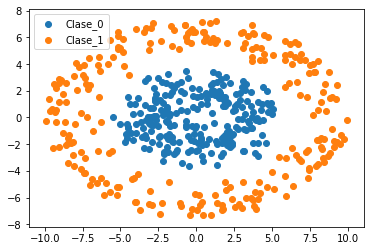

In [4]:
scatter_plot(x, y)

In [ ]:
#@title Pregunta Abierta
#@markdown  ¿El problema es linealmente separable? justifique su respuesta 
respuesta_3 = "" #@param {type:"string"}

## Ejercicio 2.2: entrenamiento

En esta sección se va a realizar un procedimiento análogo a la parte 1, pero con el modelo de *regresión logística* que sirve para resolver problemas de clasificación (en principio biclase).

Analice los siguientes métodos a la luz de la teoría vista para el modelo de regresión logística: 

1. función de activación (<font color='blue'>sigmoidal</font>),
2.  modelo de regresión logística (<font color='blue'>logistic_regression</font>), 
3. potencia del polinomio 
4.  el cálculo del error en clasificación (<font color='blue'>error_logistic</font>)
5. el gradiente descendente. 

Luego de recordar estos conceptos. Complete la función sigmoidal:

In [ ]:
#Ejercicio de Código
def sigmoidal(z):
    """Función de activación Sigmoidal

    z: es la varible a la que se le va aplicar el sigmoide.
       es un array numpy de uan sola dimension
    retorna: el valor del sigmiode

    """
    #Complete la siguiente línea con el código para calcular la salida de la función sigmoidal
    s = 
    
    return s

In [ ]:
## la funcion que prueba tu implementacion
GRADER.run_test("ejercicio2.3", sigmoidal)

El la siguiente celda se sugiere la implementación, de los siguientes conceptos:

1. modelo de regresión logística (<font color='blue'>logistic_regression</font>), 
2. potencia del polinomio 
3.  el cálculo del error en clasificación (<font color='blue'>error_logistic</font>)

comprenda que hacen estas funciones y ejecute la celda para cargar las funciones, para porder usarlas

In [ ]:
def logistic_regression(X, W):
    """calcula la regresión logistica
    X: los valores que corresponden a las caractersiticas
    W: son los pesos usadados para realizar la regresión
    retorna: valor estimado por la regresion
    """
    #Con np.dot se realiza el producto matricial. Aquí X (extendida) tiene dim [Nxd] y W es dim [dx1]
    Yest = np.dot(X,W)
    Y_lest = sigmoidal(Yest)
        
    return Y_lest    

def error_logistic(Y_lest, Y):
    """calculo del error logistico
       Si es diferente el Y_estimado con el Y_real cuenta como un error
       Y_lest: numpy array con los valores de etiquetas estimadas
       Y:  numpy array  valor con los valores reales de las etiquetas
       retorna: error de clasificación -- numpy array
    """
    error = 0
    for ye, y in zip(Y_lest, Y):
        if ye != y:
            error += 1
    
    error = error/np.size(Y)

    return error

In [ ]:
#Aca llamamos la funcion creada anteriormente
# para obtener el numero muestras y caractersiticas
muestras,caracterisitcas,num_clases = clases_muestras_carac(x, y)
y = y.reshape(np.size(y), 1)

Recordando lo aprendido anteriormente, dividimos nuestro cojunto de datos y normalizamos. Ahora usamos una aproximación de un poco más alto nivel.

In [ ]:
#Dejamos algunas muestras para el proceso de entrenamiento y otras para evaluar qué tan bueno fue el aprendizaje del modelo
from sklearn.model_selection import train_test_split
random.seed(1)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size=0.3, random_state=1)

Ahora vamos a completar el código de la regla de actualización de los parámetros del algoritmo de <font color='blue'>gradiente_descedente</font>. Adicionalmente, dentro de nuestra función, **vamos incluir una transformación polinómica**.

Nota: Para el problema de clasificación tenga presente que si ya implementó la regla de actualización de parámetros para el modelo de regresión polinomial múltiple, este punto es trivial, puesto que sólo tiene que incluir la función sigmoidal tal como lo vimos en la teoría.

In [ ]:
#ejercicio de codigo
def gradiente_descendente_logistic_poly(X,Y,grado,eta, iteraciones):
    """Gradiente descendente para regresión lineal múltiple
    X: Matriz de datos extendida
    Y: vector con los valores a predecir
    W: Vector de parámetros del modelo
    eta: Taza de aprendizaje
    grado: grado para usar en la transformacion polinomica
    iteraciones: numero de iteraciones maxima

    retorna: W el valor de de los parametros de regresión polinomica
    """
    Y = Y.reshape(-1,1)
    
    #Extendemos las variables para usar polinomios de grado superior
    X2 = potenciaPolinomio(X,grado)
    
    #Normalizamos
    X2_n,scaler = 
    
    #Extendemos la matriz
    X2_n= 
    
    #Tomamos el número de variables del problema leugo de la transformacion
    d = np.size(X2_n,1)
    #Tomamos el número de muestras de la base de datos
    N = np.size(X2_n,0)   
    #Inicializamos el vector de parámetros
    W = np.zeros(d)
    W = W.reshape(np.size(W),1)
   
   
    for iter in range(iteraciones):
       
        #Aquí debe completar el código con la regla de actualización de los parámetros W para regresión
        #logística. Tenga en cuenta los nombres de las variables ya creadas
        Y_estimado = logistic_regression(X2_n,W)

        W = 


    #Error en clasificación  
    Y_estimado = np.round(logistic_regression(X2_n,W))
    error_clasificacion = error_logistic(Y_estimado,Y)
    print("error despues de finalizar la iteraciones", error_clasificacion)
    return W, scaler

In [ ]:
## la funcion que prueba tu implementacion
GRADER.run_test("ejercicio2.4", gradiente_descendente_logistic_poly)

Finalmente se sugiere la siguiente funcion para evaluar el error del modelo. Entienda su funcionamiento.

In [ ]:
def evaluar_modelo (W, X_to_test, Y_True, grado,scaler):
    """ funcion que evalua un modelo de regresión usando el error cuadratico medio

    W: es un matriz con los parametros del modelo entrenados
    X_to_test: conjunto de datos para usar en el evaluamiento del modelo
    Y_True: valores reales para usar en el evaluamiento del modelo
    grado: valor del polinomio a usar

    retorna: el de clasificación.
    """
    X2 = potenciaPolinomio(X_to_test,grado)
    X2 = scaler.transform(X2)
    
    Y_estimado = np.round(logistic_regression(MatrizExtendida(X2),W))
    error_clasificacion = error_logistic(Y_estimado,Y_True)
    return(error_clasificacion)


## Ejercicio 2.3: Experimentar

Con la función implementada vamos a entrenar un modelo y calcular su error de entrenamiento

In [ ]:
w, scaler = gradiente_descendente_logistic_poly(Xtrain,Ytrain,1,0.0001, 1000)
error_test = evaluar_modelo(w, Xtest, Ytest, 1, scaler)
print("error en el conjunto de pruebas", error_test)

En nuestro primer experimento vamos a evaluar el rendimiento del modelo usando varias tasas de aprendizaje y grados de polinimios. Vamos a dejar por ahora un numero de iteraciones fijas = 50. Para ello completa la siguiente función.

In [ ]:
## ejercicio de codigo
def experimentar (Xtrain, Xtest, Ytrain, Ytest, tasas, grados):
    """ funcion para realizar experimentos.
    Xtrain: conjunto de datos
    Xtest:
    Ytrain:
    Ytest:
    tasas: Es una lista con los valores númericos de tasas de aprendizaje 
        para realizar los experimentos
    grados: Es una lista con los valores númericos de grados 
        para realizar los experimentos
    retorna: un dataframe con el resultados de los experimentos
    """
    numero_iter = 50

    resultados = pd.DataFrame()
    idx = 0 # indice
    for eta in tasas:
        for grado in grados:
            W,scaler = 
            error_entrenamiento = 
            error_prueba = 
                        
            resultados.loc[idx,'grado'] = grado
            resultados.loc[idx,'tasa de aprendizaje'] = eta
            resultados.loc[idx,'error_entreamiento'] = error_entrenamiento
            resultados.loc[idx,'error_prueba'] = error_prueba
            idx = idx+1

    return (resultados)

In [ ]:
## la funcion que prueba tu implementacion
GRADER.run_test("ejercicio2.5", experimentar)

In [ ]:
tasas = [1,0.1,0.001]
grados = [1,2,3,4,5]
resultados = experimentar (Xtrain, Xtest, Ytrain, Ytest, tasas, grados)

In [ ]:
# para ver los resultados
resultados

In [ ]:
#@title Pregunta Abierta
#@markdown  ¿con base a los resultados anteriores, qué efecto tiene el grado en los errores de entrenamiento y de prueba? justifique
respuesta_4 = "" #@param {type:"string"}

In [ ]:
#@title Pregunta Abierta
#@markdown  ¿es normal que los errores de entrenamiento y prueba sean diferentes? justifique
respuesta_5 = "" #@param {type:"string"}

In [ ]:
def numero_de_errores (W, X, Y, grado, scaler):
    """función que cuenta los errores de un modelo de regresión logistica
    W: vector con los parametros de un modelo de regresión logistica
       previamente entrenado
    X: conjunto de datos a usar (numpy matrix)
    Y: conjunto con las etiquetas verdaderas. (numpy array)
    grado: grado usado en el modelo de regresión logistica
    retorna: numero de errores (int/float) 
            (es decir el numero de veces que la etiqueta predicha es diferente a la etiqueta real)
    """
    X2 = potenciaPolinomio(X,grado)
    X2 = scaler.transform(X2)
    Y_estimado = np.round(logistic_regression(MatrizExtendida(X2),W))
    numero_errores = np.sum(Y_estimado!=Y)

    return numero_errores


Ahora, use las funciones que ha creado, entrene nuevamente un modelo con los mejores parametros obtenidos y calcule cuantas muestras quedaron mal clasificadas tanto en el conjunto de entrenamiento, como en el de prueba. Use la función numero_de_errores.

Si hay parametros empatados, el modelo que tenga menos parametros deberia ser el mejor.

In [ ]:
# Puede usar el siguiente código para ordenar los resultados y ver los 3 primeros
# resultados, use esta salida para ver cuales fueron los mejores parámetros
resultados.sort_values(by = ['error_prueba', 'grado'], ascending = True).head(3)

In [ ]:
W,scaler = gradiente_descendente_logistic_poly(Xtrain,Ytrain,grado = 2  ,eta = 1, iteraciones = 50)
print("estos son los pesos para el modelo entrenando \n", W)

In [ ]:
num_errores_entrenamiento =  numero_de_errores (W, Xtrain, Ytrain, 2, scaler)
num_errores_prueba =  numero_de_errores (W, Xtest, Ytest, 2, scaler)
print("muestras mal clasificadas en entrenamiento", num_errores_entrenamiento)
print("muestras mal clasificadas en pruebas", num_errores_prueba)

In [ ]:
#@title Pregunta Abierta
#@markdown ¿por qué se uso el error de prueba para ordenar la tabla de resultados en lugar del error de entrenamiento?
respuesta_6 = "" #@param {type:"string"}

In [ ]:
#@title Pregunta Abierta
#@markdown Escribe aqui el numero de muestras que quedaron mal clasificadas en el conjunto de entrenamiento y de pruebas. ¿como calificarias el modelo entrenado?
respuesta_7 = "" #@param {type:"string"}

In [ ]:
#@title Pregunta Abierta
#@markdown Escriba el modelo completo con sus variables y coeficientes de f(**x**,**w**) con la mejor frontera de decisión que encontró. usa los valores del último W entrenado. Recuerda tener presente el grado del polinomio
respuesta_8 = "0.0x1 + 1.0x1**2 + 2.0x2 + 3.0x2**3" #@param {type:"string"}

In [ ]:
GRADER.check_tests()

In [ ]:
#@title Integrantes
codigo_integrante_1 ='' #@param {type:"string"}

----
Esta linea es de uso exclusivo del los profesores


In [ ]:
GRADER.grade()